# Indicators of Heavy Traffic on I-94

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Opening the dataset

In [2]:
traffic_volume = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
traffic_volume.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic_volume.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### About the dataset

In [6]:
traffic_volume.shape

(48204, 9)

**Metro Interstate Traffic Volume Dataset** consists of 9 columns (listed below) and 48204 rows. Each row contains information about traffic and weather data for specific hour. The dataset I will be working on includes data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.  
  
The station is located approximately midway between Minneapolis and Saint Paul and only records westbound traffic.

| Variable Name       | Description                                                             |
|---------------------|-------------------------------------------------------------------------|
| holiday             | US National holidays plus regional holiday, Minnesota State Fair       |
| temp                | Average temperature in kelvin                                          |
| rain_1h             | Amount in mm of rain that occurred in the hour                        |
| snow_1h             | Amount in mm of snow that occurred in the hour                        |
| clouds_all          | Percentage of cloud cover                                             |
| weather_main        | Short textual description of the current weather                      |
| weather_description | Longer textual description of the current weather                     |
| date_time           | Hour of the data collected in local CST time                          |
| traffic_volume      | Hourly I-94 ATR 301 reported westbound traffic volume                 |

### Analyzing Traffic Volume

<Axes: ylabel='Frequency'>

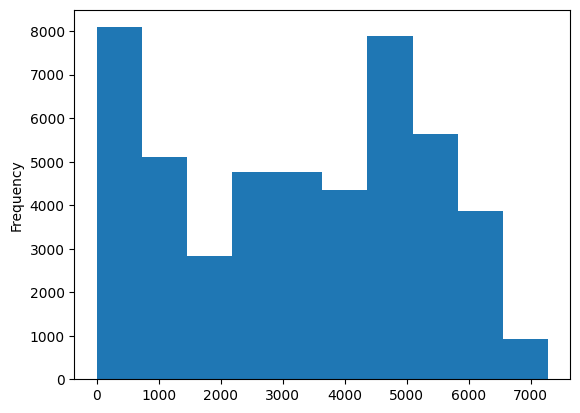

In [7]:
traffic_volume["traffic_volume"].plot.hist()

In [8]:
traffic_volume["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

On average hourly traffic volume between 2012-10-02 09:00:00 and 2018-09-30 23:00:00 totalled 3260 cars. The values varied from 0 to 7280 cars.  
  
We can see that median value is similar to mean value.  
  
Moreover about 25% of the measurement time the hourly traffic volume was only 1193 or fewer cars. This can indicate that these measurement was made during the night.  
  
Other 25% of the time, there were four times as much (4933 or more) cars passing the station each hour.

### Traffic Volume: Day vs. Night

I will start by dividing the dataset into two datasets:  
* Daytime data: hours from 7 AM to 7 PM (12 hours)
* Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [9]:
traffic_volume["date_time"] = pd.to_datetime(traffic_volume["date_time"])

In [10]:
daytime_data = traffic_volume.copy()[traffic_volume["date_time"].dt.hour.between(7, 19, inclusive="left")]

In [11]:
nighttime_data = traffic_volume.copy()[~traffic_volume["date_time"].dt.hour.between(7, 19, inclusive="left")]

In [12]:
daytime_data.shape

(23877, 9)

In [13]:
nighttime_data.shape

(24327, 9)

In [14]:
plt.figure(figsize=(11,3.5))

<Figure size 1100x350 with 0 Axes>

<Figure size 1100x350 with 0 Axes>

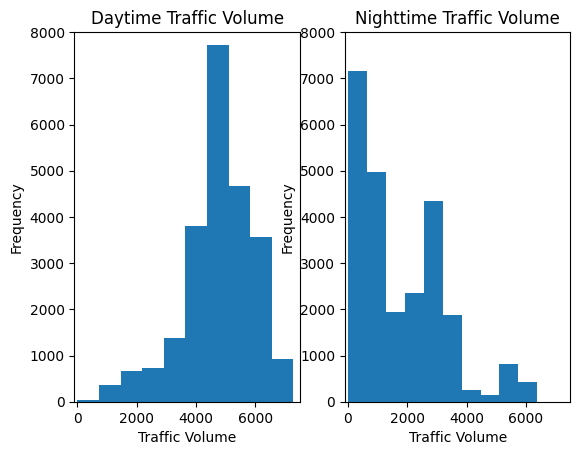

In [15]:
plt.subplot(1,2,1)
plt.hist(daytime_data["traffic_volume"])
plt.title("Daytime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.subplot(1,2,2)
plt.hist(nighttime_data["traffic_volume"])
plt.title("Nighttime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.show()

In [16]:
daytime_data["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [17]:
nighttime_data["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

During the day average traffic volume is about three times greater than traffic volume during the night. 
  
For both: day and night minimum traffic volume totals 0 cars. This can indicate that the road was under construction for some time.

The histogram that shows distribution of traffic volume during the night is right skewed. 75% of time traffic volume did not exceed 2819 cars, and 50% of time traffic volume did not exceed 1287 cars. 

For comparison the histogram displaying distribution of traffic volume during the daytime is left skewed. We can see that the traffic volume totalled less than 4254 cars only for 25% of time. This means that most of traffic volume values are high.

Because my goal is to find indicators of heavy traffic, for my future analysis I will be not using nighttime data. Even though there are still measurements over 5000 cars in nighttime dataset, the traffic volume during the night is generally light.

### Time indicators - months

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at the certain time of the day.  
  
Now I will analyse how do the traffic volume change according to month.

In [18]:
daytime_data["month"] = daytime_data["date_time"].dt.month

In [19]:
by_month = daytime_data.groupby("month").mean(numeric_only = True)

In [20]:
by_month["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

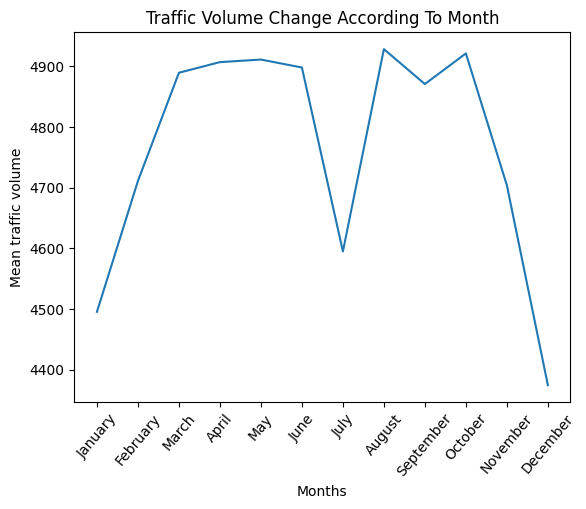

In [21]:
plt.plot(by_month["traffic_volume"])
plt.title("Traffic Volume Change According To Month")
plt.xlabel("Months")
plt.xticks(
    ticks=[1,2,3,4,5,6,7,8,9,10,11,12], 
    labels = ["January", "February", "March", "April","May", "June", "July", "August", "September","October", "November","December"],
    rotation=50)
plt.ylabel("Mean traffic volume")
plt.show()

We can see during cold months (November-February) traffic volume is not as heavy as during warmer months (March-October). But there is an exception among the warm month - July. In July traffic vollume is less heavy than in other warm months. 

Let's check if traffic volume in July is less heavy than in other warm months each year.

In [22]:
daytime_data["year"] = daytime_data["date_time"].dt.year

In [23]:
july_only = daytime_data[daytime_data["month"] == 7]

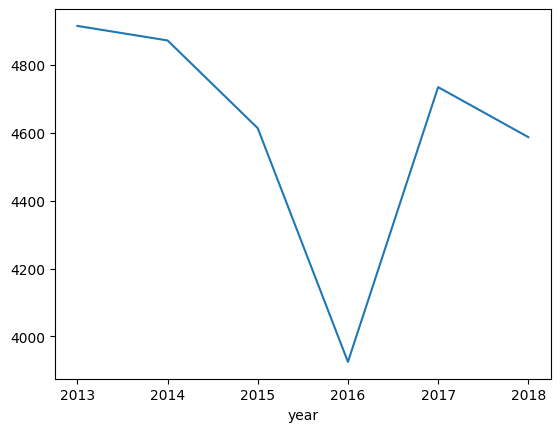

In [24]:
by_year = july_only.groupby("year").mean(numeric_only=True)
by_year["traffic_volume"].plot.line()
plt.show()

We can see that usually in July the traffic volume is similar to other warm months. The only exception is July in 2016, which had a high decrease in traffic volume. The reason for that might be that the road was under construction July 2016. We can verify this hypothesis by doing some research. [This article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) tells us that our hypothesis is right.  
  
All things considered we can say that during cold months traffic volume generally decreases in comparison to warm months
  

### Time indicators - days of the week

Next I will analyse how does day of the week impact the traffic volume. We can assume that during business days traffic volume will be higher than in the weekends because of people who comunte to work, but let's check it.

In [25]:
daytime_data["day_of_week"] = daytime_data["date_time"].dt.dayofweek

In [26]:
by_day_of_week = daytime_data.groupby("day_of_week").mean(numeric_only=True)

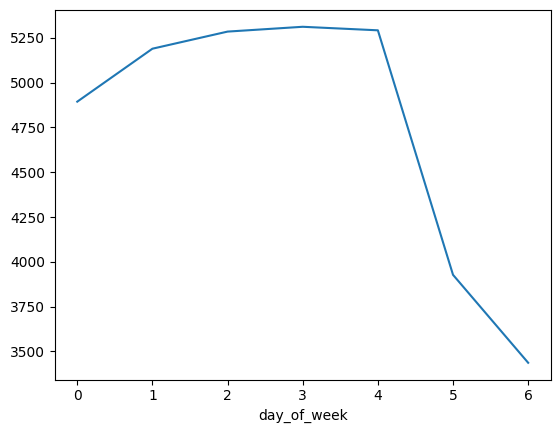

In [27]:
by_day_of_week["traffic_volume"].plot.line()
plt.show()

We can see that, as we has assumed, the traffic volume decreases on weekend days - values are below 4000 cars. On business days (Monday-Friday) it is significantly heavier. 

### Time indicators - time of the day 

Next, I will analyse how does the traffic volume change during the day. Because data from weekend days will drag down the average values, I will look at the averages separately.

In [28]:
daytime_data["hour"] = daytime_data["date_time"].dt.hour

In [29]:
business_days = daytime_data.copy()[daytime_data["day_of_week"] <= 4] # 4 == Friday

In [30]:
weekend_days = daytime_data.copy()[daytime_data["day_of_week"] >= 5] # 5 == Saturday

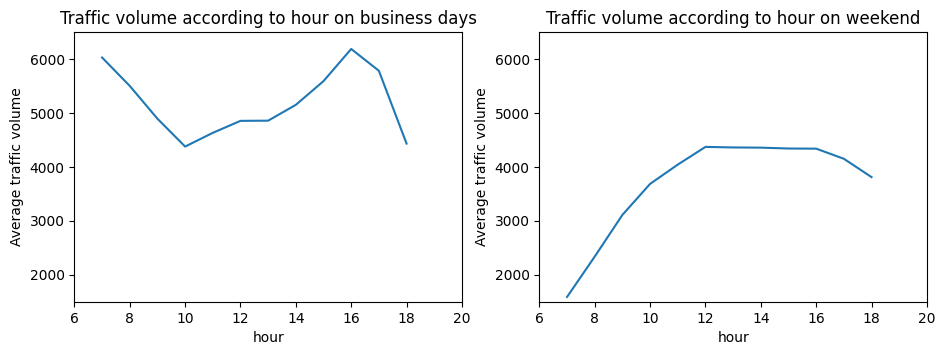

In [31]:
by_hour_business = business_days.groupby("hour").mean(numeric_only=True)
by_hour_weekend = weekend_days.groupby("hour").mean(numeric_only=True)

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)

by_hour_business["traffic_volume"].plot.line()
plt.title("Traffic volume according to hour on business days")
plt.ylabel("Average traffic volume")
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.subplot(1, 2, 2)

by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic volume according to hour on weekend")
plt.ylabel("Average traffic volume")
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()

We can see that generally during business days on each our traffic volume is heavier than on weekend. As we might have expected the heaviest traffic volume on business days is when people commute to work (around 7) and when they come back home (around 16) - then we can see values over 6000 cars. 

To sum up:
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

### Weather indicators

Other traffic indicator might be weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.  
  
I will start by looking up at correlation of the columns that are numerical with traffic volume column.

In [32]:
traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [46]:
daytime_data_numeric = daytime_data.drop(columns=['hour','month','year','day_of_week','holiday', 'weather_main', 'weather_description', 'date_time'])

In [47]:
daytime_data_numeric.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

Rain_1h, snow_1h, clouds_all columns do not show any strong correlation with traffic volume. The strongest correlation we can see - between traffic volume and temperature - is still weak, but let's generate a scatter plot to visualize it.

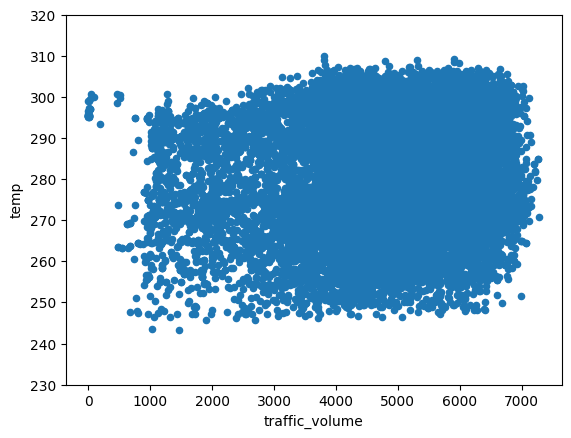

In [50]:
daytime_data.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

In conclusion, temperature is not a solid indicator of traffic volume. 

### Weather indicators - weather types


In [51]:
by_weather_main = daytime_data.groupby('weather_main').mean(numeric_only=True)
by_weather_description = daytime_data.groupby('weather_description').mean(numeric_only=True)

<Axes: ylabel='weather_main'>

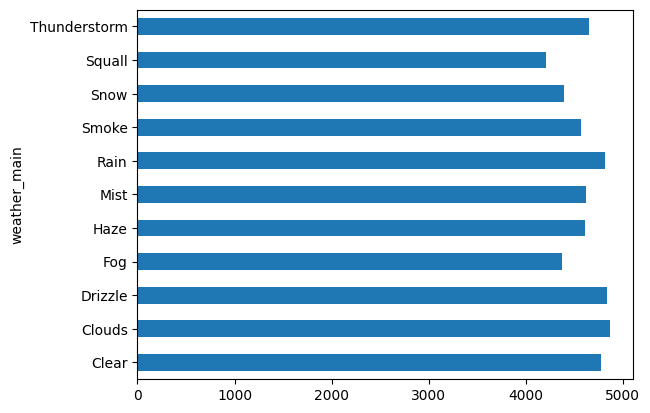

In [53]:
by_weather_main["traffic_volume"].plot.barh()

We can see that there is no weather type where traffic volume exceeds 5000 cars. The traffic volume is quite similar during each weather type.

<Axes: ylabel='weather_description'>

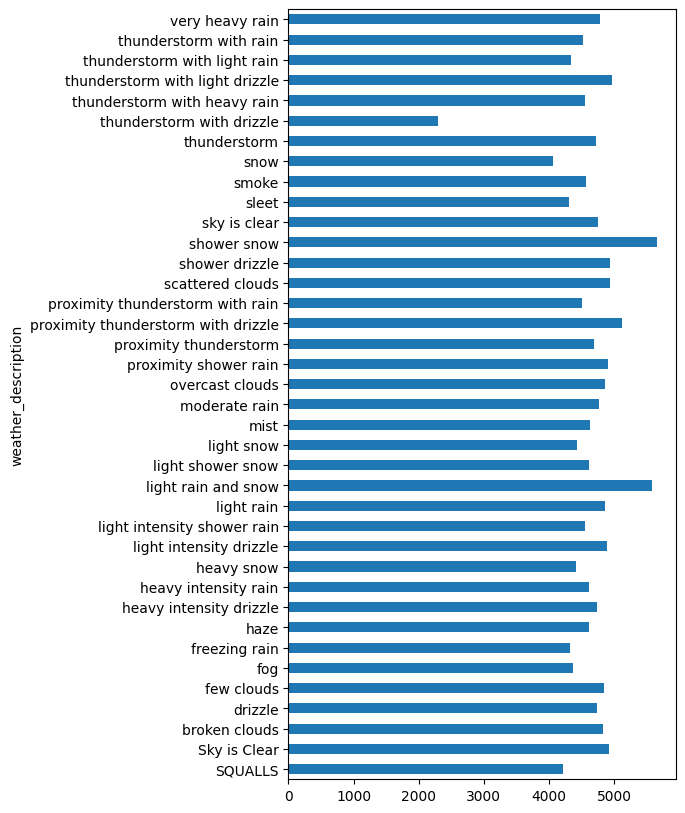

In [55]:
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))

It looks like there are three weather types where traffic volume exceeds 5,000:  

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle  
  
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

### Conclusions

In this project, I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. I managed to find two types of indicators:

**Time indicators**
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.  
  
**Weather indicators**
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle